In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data
import time

In [2]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

W0624 14:33:41.900536  6328 deprecation.py:323] From <ipython-input-2-319879c4c296>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0624 14:33:41.907529  6328 deprecation.py:323] From D:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0624 14:33:41.908529  6328 deprecation.py:323] From D:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating

Extracting MNIST_data/train-images-idx3-ubyte.gz


W0624 14:33:42.284300  6328 deprecation.py:323] From D:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0624 14:33:42.288297  6328 deprecation.py:323] From D:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0624 14:33:42.359253  6328 deprecation.py:323] From D:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a

Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
def weight(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.1), name='w')

In [4]:
def bias(shape):
    return tf.Variable(tf.constant(0.1, shape=shape), name='b')

In [5]:
def conv2d(x, w):
    return tf.nn.conv2d(x, w, strides=[1, 1, 1, 1], padding='SAME')

In [6]:
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [7]:
with tf.name_scope('Input_Layer'):
    x = tf.placeholder('float', shape=[None, 784], name='x')
    x_image = tf.reshape(x, [-1, 28, 28, 1])

In [8]:
with tf.name_scope('C1_Conv'):
    w1 = weight([5, 5, 1,16])
    b1 = bias([16])
    conv1 = conv2d(x_image, w1) + b1
    C1_Conv = tf.nn.relu(conv1)

In [9]:
with tf.name_scope('C1_Pool'):
    C1_Pool = max_pool_2x2(C1_Conv)

In [10]:
with tf.name_scope('C2_Conv'):
    w2 = weight([5, 5, 16, 36])
    b2 = bias([36])
    conv2 = conv2d(C1_Pool, w2) + b2
    C2_Conv = tf.nn.relu(conv2)

In [11]:
with tf.name_scope('C2_Pool'):
    C2_Pool = max_pool_2x2(C2_Conv)

In [12]:
with tf.name_scope('D_Flat'):
    D_Flat = tf.reshape(C2_Pool, [-1, 1764])

In [13]:
with tf.name_scope('D_Hidden_Layer'):
    w3 = weight([1764, 128])
    b3 = bias([128])
    D_Hidden = tf.nn.relu(tf.matmul(D_Flat, w3) + b3)
    D_Hidden_Dropout = tf.nn.dropout(D_Hidden, keep_prob=0.8)

W0624 14:33:44.278198  6328 deprecation.py:506] From <ipython-input-13-a69707b132a3>:5: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
with tf.name_scope('Output_Layer'):
    w4 = weight([128, 10])
    b4 = bias([10])
    y_predict = tf.nn.softmax(tf.matmul(D_Hidden_Dropout, w4) + b4)

In [15]:
with tf.name_scope('optimizer'):
    y_label = tf.placeholder('float', shape=[None, 10], name='y_label')
    loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predict, labels=y_label))
    optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(loss_function)

W0624 14:33:44.552005  6328 deprecation.py:323] From <ipython-input-15-63943add4f42>:3: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [16]:
with tf.name_scope('evaluate_model'):
    correct_prediction = tf.equal(tf.argmax(y_predict, 1), tf.arg_max(y_label, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))

W0624 14:33:44.847822  6328 deprecation.py:323] From <ipython-input-16-a2b103d1b4cc>:2: arg_max (from tensorflow.python.ops.gen_math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.math.argmax` instead


In [17]:
train_epochs = 30
batch_size = 100
total_batchs = int(mnist.train.num_examples / batch_size)
epoch_list = []
accuracy_list = []
loss_list = []

start_time = time.time()

sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [18]:
for epoch in range(train_epochs):
    for i in range(total_batchs):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(optimizer, feed_dict={x:  batch_x, y_label: batch_y})
  
    loss, acc = sess.run([loss_function, accuracy], feed_dict={x: mnist.validation.images, y_label: mnist.validation.labels})
    
    epoch_list.append(epoch)
    loss_list.append(loss)
    accuracy_list.append(acc)
    print('Train Epoch:', '%02d' % (epoch + 1), 'Loss=', '{:.9f}'.format(loss), 'Accuracy=', acc)
duration = time.time() - start_time
print('Train Finished takes:', duration)

Train Epoch: 01 Loss= 1.581947803 Accuracy= 0.9064
Train Epoch: 02 Loss= 1.538594365 Accuracy= 0.9324
Train Epoch: 03 Loss= 1.520123839 Accuracy= 0.9494
Train Epoch: 04 Loss= 1.508325934 Accuracy= 0.9588
Train Epoch: 05 Loss= 1.502163529 Accuracy= 0.965
Train Epoch: 06 Loss= 1.498953223 Accuracy= 0.967
Train Epoch: 07 Loss= 1.493265867 Accuracy= 0.9712
Train Epoch: 08 Loss= 1.490195870 Accuracy= 0.9734
Train Epoch: 09 Loss= 1.490675688 Accuracy= 0.9728
Train Epoch: 10 Loss= 1.487018704 Accuracy= 0.9766
Train Epoch: 11 Loss= 1.486655235 Accuracy= 0.9774
Train Epoch: 12 Loss= 1.486393571 Accuracy= 0.9776
Train Epoch: 13 Loss= 1.483861566 Accuracy= 0.9778
Train Epoch: 14 Loss= 1.482590318 Accuracy= 0.9808
Train Epoch: 15 Loss= 1.480504632 Accuracy= 0.9828
Train Epoch: 16 Loss= 1.482350945 Accuracy= 0.9804
Train Epoch: 17 Loss= 1.480824471 Accuracy= 0.982
Train Epoch: 18 Loss= 1.478852510 Accuracy= 0.984
Train Epoch: 19 Loss= 1.479546189 Accuracy= 0.9826
Train Epoch: 20 Loss= 1.478169322 A

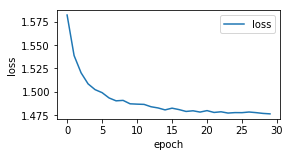

In [19]:
fig = plt.gcf()
fig.set_size_inches(4, 2)
plt.plot(epoch_list, loss_list, label='loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper right')

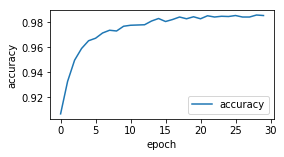

In [20]:
fig = plt.gcf()
fig.set_size_inches(4, 2)
plt.plot(epoch_list, accuracy_list, label='accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'], loc='lower right')

In [21]:
print('Accuracy:', sess.run(accuracy, feed_dict={x: mnist.test.images, y_label: mnist.test.labels}))

Accuracy: 0.9864


In [22]:
prediction_result = sess.run(tf.argmax(y_predict, 1), feed_dict={x: mnist.test.images})

In [23]:
prediction_result[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [24]:
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, i + 1)
        ax.imshow(np.reshape(images[idx], (28, 28)), cmap='binary')
        title = 'label=' + str(np.argmax(labels[idx]))
        if len(prediction) > 0:
            title += ', predict=' + str(prediction[idx])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

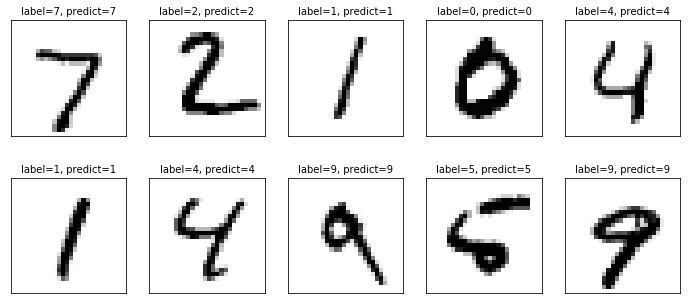

In [25]:
plot_images_labels_prediction(mnist.test.images, mnist.test.labels, prediction_result, 0)

In [26]:
merged = tf.summary.merge_all()
train_where = tf.summary.FileWriter('log/CNN', sess.graph)